## Environment Setup

In [1]:
#!pip install openpyxl

In [24]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


import sys
sys.path.insert (0, './_functions_/')
from functions_eda import *

## Datasets

In [31]:
autos_2023 = pd.read_csv("./clean_data/autos_state_2023.csv")
population = pd.read_csv('./clean_data/population_states_stations.csv')


In [32]:

population_2023 = population.merge (eautos_2023, on ="state", how = "left")

population_2023.to_csv('./clean_data/population_stations_cars.csv', index = False)
population_2023.head(5)


,state,inhabitants,area,population_density,number_of_charging_points,number_of_stations,number_fast_charging_stations,number_regular_charging_stations,number_of_electric_cars
0,Baden-Württemberg,11280257,3574785,316,11419,5678,842,4836,320946
1,Bayern,13369393,7054158,190,12367,6722,873,5849,363975
2,Berlin,3755251,89112,4214,1641,954,144,810,58496
3,Brandenburg,2573135,2965438,87,1440,737,152,585,39206
4,Bremen,684864,41961,1632,516,247,31,216,11033


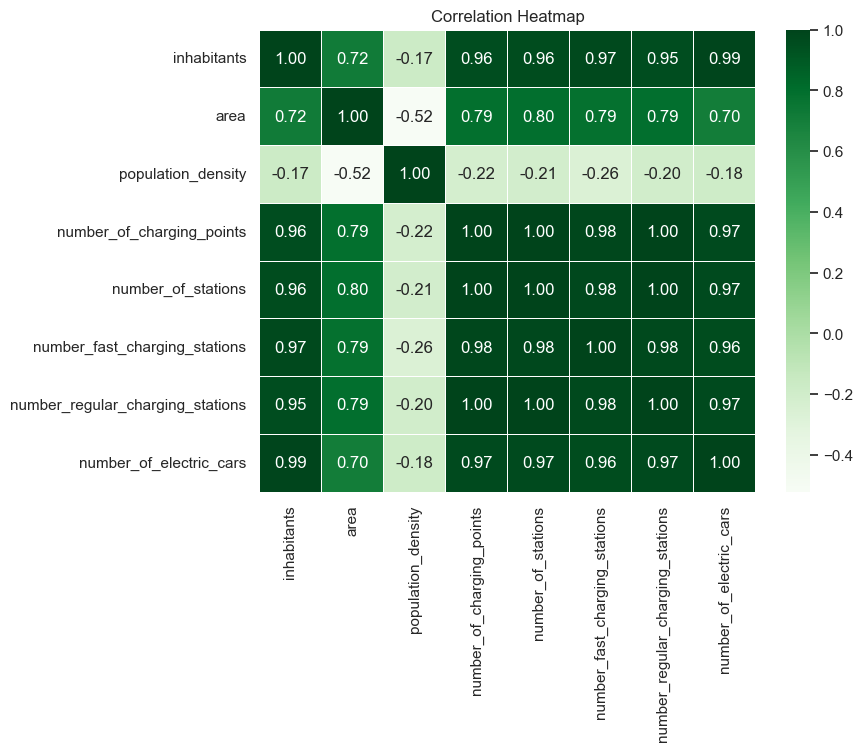

In [33]:
# Compute the correlation matrix
corr_matrix = population_2023.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


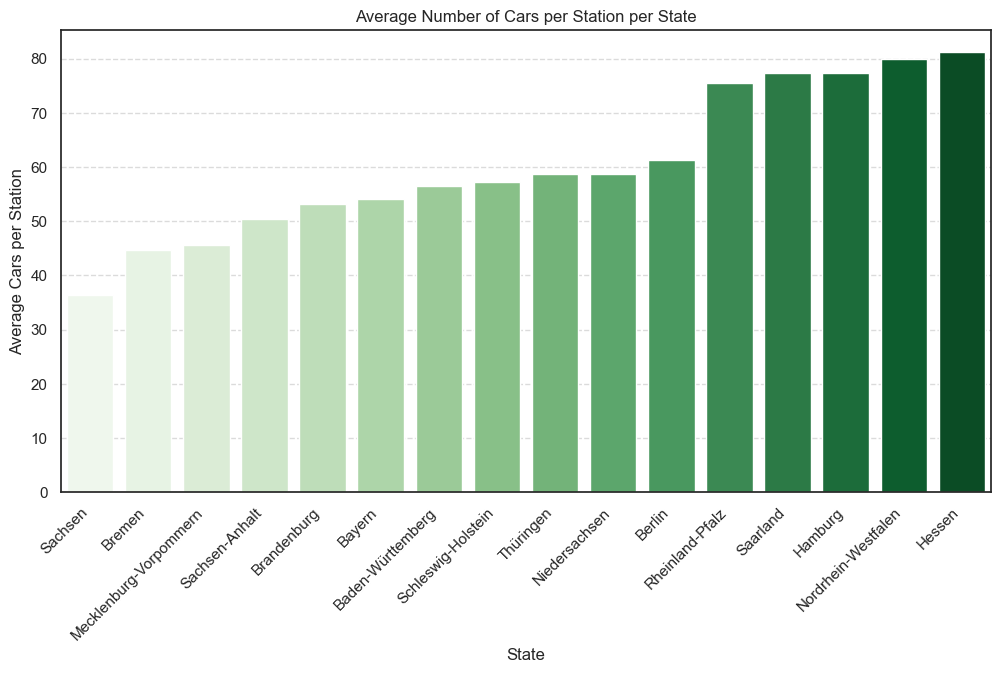

In [34]:
# Calculate the average cars per station
population_2023["cars_per_station"] = population_2023["number_of_electric_cars"] / population_2023["number_of_stations"]

# Sort values for better visualization
df_sorted = population_2023.sort_values("cars_per_station", ascending=True)

# Plot
plt.figure(figsize=(12, 6))

sns.barplot(x = "state", y = "cars_per_station", data= df_sorted, palette = 'Greens')

plt.xlabel("State")
plt.ylabel("Average Cars per Station")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Average Number of Cars per Station per State")
plt.xticks(rotation=45, ha="right")
plt.show()


In [35]:
population_2023.to_csv('./clean_data/population_states_stations_2023.csv', index=False)